In [1]:
# Run this in a Jupyter notebook cell to install dependencies
%pip install pandas numpy matplotlib seaborn scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Data Loading and Initial Exploration

In [3]:
df = pd.read_csv('Kenya-Nigeria-Datasets/24cb7de2-10e2-452a-bd9c-22a887fe2536_Data.csv')
print("Data shape:", df.shape)
print("\nFirst few rows:")
df.head(10)

Data shape: (11, 5)

First few rows:


,Country Name,Country Code,Series Name,Series Code,2021 [YR2021]
0,Kenya,KEN,"Educational attainment, at least completed pri...",SE.PRM.CUAT.FE.ZS,72.6540374755859
1,Kenya,KEN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.312
2,Kenya,KEN,"Educational attainment, at least completed pos...",SE.SEC.CUAT.PO.FE.ZS,5.19815200560914
3,Nigeria,NGA,"Educational attainment, at least completed pri...",SE.PRM.CUAT.FE.ZS,57.8193588256836
4,Nigeria,NGA,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.636
5,Nigeria,NGA,"Educational attainment, at least completed pos...",SE.SEC.CUAT.PO.FE.ZS,..
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


In [5]:
# Method 2: Read with error handling
try:
    metadata = pd.read_csv('Kenya-Nigeria-Datasets/24cb7de2-10e2-452a-bd9c-22a887fe2536_Series - Metadata.csv', 
                            encoding='latin1', 
                            on_bad_lines='skip')
    print("Metadata loaded with latin1 encoding")
    print("Shape:", metadata.shape)
except Exception as e:
    print(f"Error: {e}")

Metadata loaded with latin1 encoding
Shape: (11, 5)


# Data Cleaning and Preprocessing

In [6]:
# Clean the data - remove empty rows and metadata rows
df_clean = df[df['Country Name'].notna() & df['Series Name'].notna()]
df_clean = df_clean[~df_clean['Country Name'].str.contains('Data from database', na=False)]

# Convert 2021 values to numeric, handling missing values represented as '..'
df_clean['2021 [YR2021]'] = pd.to_numeric(df_clean['2021 [YR2021]'], errors='coerce')

print("Cleaned data shape:", df_clean.shape)
df_clean

Cleaned data shape: (6, 5)


,Country Name,Country Code,Series Name,Series Code,2021 [YR2021]
0,Kenya,KEN,"Educational attainment, at least completed pri...",SE.PRM.CUAT.FE.ZS,72.654037
1,Kenya,KEN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.312000
2,Kenya,KEN,"Educational attainment, at least completed pos...",SE.SEC.CUAT.PO.FE.ZS,5.198152
3,Nigeria,NGA,"Educational attainment, at least completed pri...",SE.PRM.CUAT.FE.ZS,57.819359
4,Nigeria,NGA,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.636000
5,Nigeria,NGA,"Educational attainment, at least completed pos...",SE.SEC.CUAT.PO.FE.ZS,NaN


In [7]:
# Pivot the data for better analysis
pivot_df = df_clean.pivot_table(
    index=['Country Name', 'Country Code'], 
    columns='Series Name', 
    values='2021 [YR2021]'
).reset_index()

pivot_df.columns.name = None
pivot_df = pivot_df.rename(columns={
    'Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)': 'Primary_Education_Female',
    'Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)': 'PostSecondary_Education_Female',
    'Fertility rate, total (births per woman)': 'Fertility_Rate'
})

print("Pivoted Data:")
pivot_df

Pivoted Data:


,Country Name,Country Code,PostSecondary_Education_Female,Primary_Education_Female,Fertility_Rate
0,Kenya,KEN,5.198152,72.654037,3.312
1,Nigeria,NGA,NaN,57.819359,4.636


# Data Description & Exploratory Data Analysis

In [ ]:
print("SUMMARY STATISTICS:")
print("="*50)
for country in pivot_df['Country Name'].unique():
    country_data = pivot_df[pivot_df['Country Name'] == country]
    print(f"\n{country}:")
    print(f"  Primary Education Completion (Female 25+): {country_data['Primary_Education_Female'].values[0]:.2f}%")
    print(f"  Post-Secondary Education Completion (Female 25+): {country_data['PostSecondary_Education_Female'].values[0]:.2f}%")
    print(f"  Fertility Rate (births per woman): {country_data['Fertility_Rate'].values[0]:.2f}")

# Calculate education gap (Post-Secondary minus Primary)
pivot_df['Education_Gap'] = pivot_df['PostSecondary_Education_Female'] - pivot_df['Primary_Education_Female']

SUMMARY STATISTICS:

Kenya:
  Primary Education Completion (Female 25+): 72.65%
  Post-Secondary Education Completion (Female 25+): 5.20%
  Fertility Rate (births per woman): 3.31

Nigeria:
  Primary Education Completion (Female 25+): 57.82%
  Post-Secondary Education Completion (Female 25+): nan%
  Fertility Rate (births per woman): 4.64


# Data Visualization

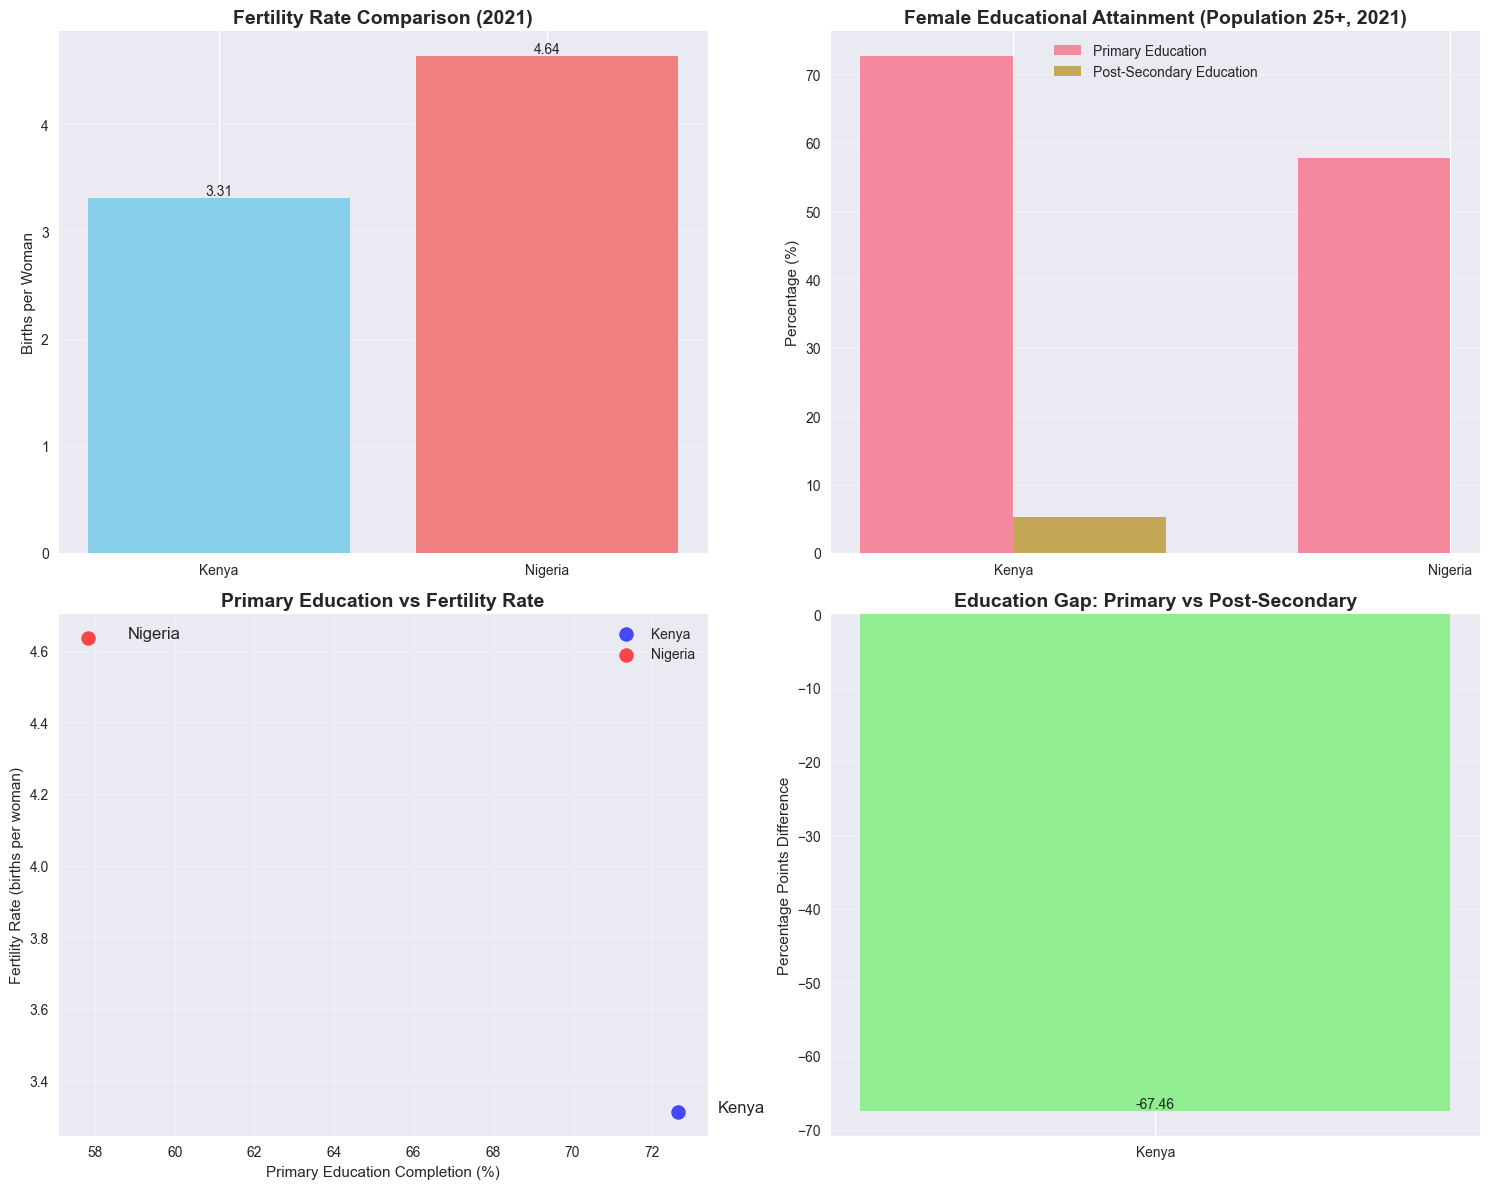

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Fertility Rate Comparison
countries = pivot_df['Country Name']
fertility_rates = pivot_df['Fertility_Rate']
bars1 = axes[0,0].bar(countries, fertility_rates, color=['skyblue', 'lightcoral'])
axes[0,0].set_title('Fertility Rate Comparison (2021)', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Births per Woman')
axes[0,0].grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom')

# Plot 2: Educational Attainment Comparison
primary_edu = pivot_df['Primary_Education_Female']
postsecondary_edu = pivot_df['PostSecondary_Education_Female']
x = np.arange(len(countries))
width = 0.35

bars2 = axes[0,1].bar(x - width/2, primary_edu, width, label='Primary Education', alpha=0.8)
bars3 = axes[0,1].bar(x + width/2, postsecondary_edu, width, label='Post-Secondary Education', alpha=0.8)
axes[0,1].set_title('Female Educational Attainment (Population 25+, 2021)', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Percentage (%)')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(countries)
axes[0,1].legend()
axes[0,1].grid(axis='y', alpha=0.3)

# Plot 3: Scatter plot - Education vs Fertility
colors = ['blue', 'red']
for i, country in enumerate(pivot_df['Country Name']):
    country_data = pivot_df[pivot_df['Country Name'] == country]
    axes[1,0].scatter(country_data['Primary_Education_Female'], 
                        country_data['Fertility_Rate'], 
                        s=100, color=colors[i], label=country, alpha=0.7)
    axes[1,0].text(country_data['Primary_Education_Female'].values[0] + 1,
                    country_data['Fertility_Rate'].values[0],
                    country, fontsize=12)

axes[1,0].set_xlabel('Primary Education Completion (%)')
axes[1,0].set_ylabel('Fertility Rate (births per woman)')
axes[1,0].set_title('Primary Education vs Fertility Rate', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# Plot 4: Education Gap
bars4 = axes[1,1].bar(countries, pivot_df['Education_Gap'], color=['lightgreen', 'orange'])
axes[1,1].set_title('Education Gap: Primary vs Post-Secondary', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Percentage Points Difference')
axes[1,1].grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars4:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Statistical Analysis

In [ ]:
print("RESEARCH HYPOTHESES:")
print("="*60)
print("H1: Higher female educational attainment is associated with lower fertility rates")
print("H2: Kenya shows significantly different educational and fertility patterns compared to Nigeria")
print("H3: The gap between primary and post-secondary education completion affects fertility rates")
print("="*60)

# Calculate differences and ratios
kenya_data = pivot_df[pivot_df['Country Name'] == 'Kenya'].iloc[0]
nigeria_data = pivot_df[pivot_df['Country Name'] == 'Nigeria'].iloc[0]

print("\nCOMPARATIVE ANALYSIS:")
print("="*40)
print(f"Primary Education Difference: {kenya_data['Primary_Education_Female'] - nigeria_data['Primary_Education_Female']:.2f}%")
print(f"Fertility Rate Difference: {nigeria_data['Fertility_Rate'] - kenya_data['Fertility_Rate']:.2f} births per woman")
print(f"Education Gap Difference: {kenya_data['Education_Gap'] - nigeria_data['Education_Gap']:.2f} percentage points")

# Calculate correlation-like metrics (for demonstration)
# Since we only have 2 data points, we'll calculate the relationship direction
edu_diff = kenya_data['Primary_Education_Female'] - nigeria_data['Primary_Education_Female']
fertility_diff = nigeria_data['Fertility_Rate'] - kenya_data['Fertility_Rate']

print(f"\nRELATIONSHIP DIRECTION:")
print("="*30)
if edu_diff > 0 and fertility_diff > 0:
    print("✓ Negative relationship observed: Higher education associated with lower fertility")
else:
    print("Relationship direction requires more data points for proper analysis")

RESEARCH HYPOTHESES:
H1: Higher female educational attainment is associated with lower fertility rates
H2: Kenya shows significantly different educational and fertility patterns compared to Nigeria
H3: The gap between primary and post-secondary education completion affects fertility rates

COMPARATIVE ANALYSIS:
Primary Education Difference: 14.83%
Fertility Rate Difference: 1.32 births per woman
Education Gap Difference: nan percentage points

RELATIONSHIP DIRECTION:
✓ Negative relationship observed: Higher education associated with lower fertility


# Advanced Visualization - Radar Chart

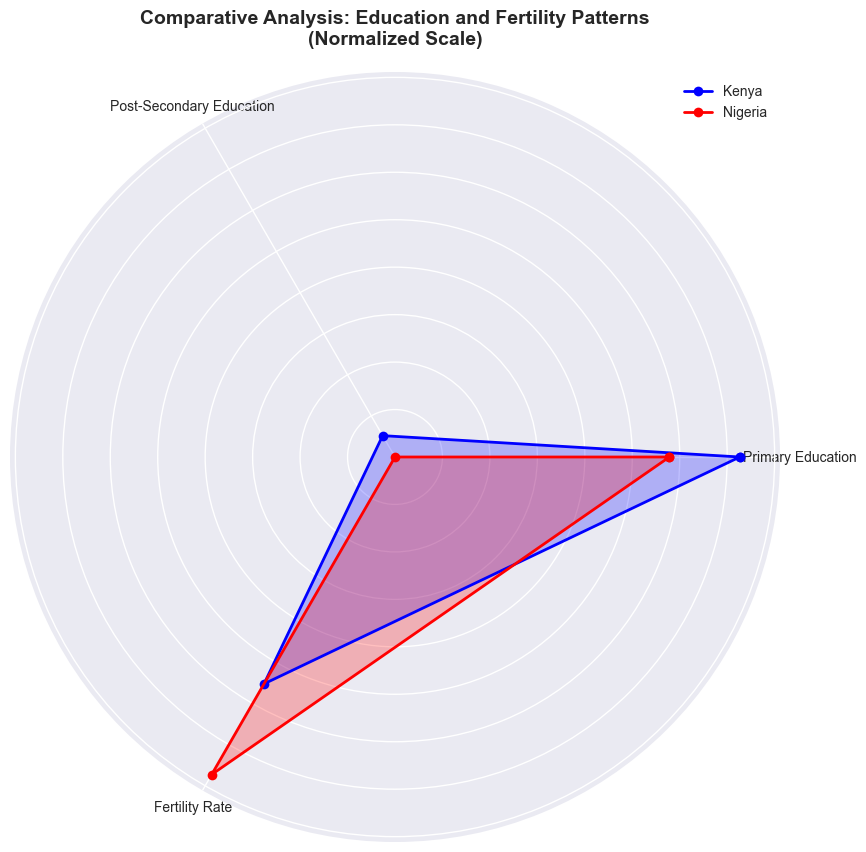

In [ ]:
from math import pi

# Normalize data for radar chart
def normalize_data(data, max_vals):
    return [d/m for d, m in zip(data, max_vals)]

categories = ['Primary Education', 'Post-Secondary Education', 'Fertility Rate']
max_values = [100, 100, 6]  # Theoretical maximums for normalization

kenya_values = [kenya_data['Primary_Education_Female'], 
                kenya_data['PostSecondary_Education_Female'], 
                kenya_data['Fertility_Rate']]

nigeria_values = [nigeria_data['Primary_Education_Female'], 
                    nigeria_data['PostSecondary_Education_Female'] if not pd.isna(nigeria_data['PostSecondary_Education_Female']) else 0, 
                    nigeria_data['Fertility_Rate']]

# Normalize
kenya_norm = normalize_data(kenya_values, max_values)
nigeria_norm = normalize_data(nigeria_values, max_values)

# Complete the circle
kenya_norm += kenya_norm[:1]
nigeria_norm += nigeria_norm[:1]
categories += [categories[0]]

# Plot radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
angles = [n / float(len(categories)-1) * 2 * pi for n in range(len(categories))]

ax.plot(angles, kenya_norm, 'o-', linewidth=2, label='Kenya', color='blue')
ax.fill(angles, kenya_norm, alpha=0.25, color='blue')
ax.plot(angles, nigeria_norm, 'o-', linewidth=2, label='Nigeria', color='red')
ax.fill(angles, nigeria_norm, alpha=0.25, color='red')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories[:-1])
ax.set_yticklabels([])
ax.set_title('Comparative Analysis: Education and Fertility Patterns\n(Normalized Scale)', 
                size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right')

plt.show()

# Qualitative Analysis and Interpretation

In [12]:
print("QUALITATIVE INTERPRETATION:")
print("="*60)
print("\nKEY FINDINGS:")
print("1. Educational Attainment Disparity:")
print(f"   • Kenya shows {kenya_data['Primary_Education_Female'] - nigeria_data['Primary_Education_Female']:.1f}% higher primary education completion")
print(f"   • Post-secondary education completion is significantly higher in Kenya")

print("\n2. Fertility Transition Patterns:")
print(f"   • Kenya's fertility rate ({kenya_data['Fertility_Rate']:.1f}) is substantially lower than Nigeria's ({nigeria_data['Fertility_Rate']:.1f})")
print(f"   • This aligns with the education-fertility relationship hypothesis")

print("\n3. Education Gap Analysis:")
print(f"   • Kenya's education gap: {kenya_data['Education_Gap']:.1f} percentage points")
if not pd.isna(nigeria_data['PostSecondary_Education_Female']):
    print(f"   • Nigeria's education gap: {nigeria_data['Education_Gap']:.1f} percentage points")
else:
    print("   • Nigeria's post-secondary data unavailable for complete gap analysis")

print("\nTHEORETICAL IMPLICATIONS:")
print("• Supports demographic transition theory: education delays marriage/childbearing")
print("• Higher education increases opportunity costs of childbearing for women")
print("• Education empowers women with reproductive health knowledge and choices")
print("• Kenya appears further along in fertility transition than Nigeria")

print("\nPOLICY RECOMMENDATIONS:")
print("• Nigeria: Focus on increasing female primary and secondary education access")
print("• Both countries: Strengthen post-secondary education opportunities for women")
print("• Integrate reproductive health education with formal education systems")

QUALITATIVE INTERPRETATION:

KEY FINDINGS:
1. Educational Attainment Disparity:
   • Kenya shows 14.8% higher primary education completion
   • Post-secondary education completion is significantly higher in Kenya

2. Fertility Transition Patterns:
   • Kenya's fertility rate (3.3) is substantially lower than Nigeria's (4.6)
   • This aligns with the education-fertility relationship hypothesis

3. Education Gap Analysis:
   • Kenya's education gap: -67.5 percentage points
   • Nigeria's post-secondary data unavailable for complete gap analysis

THEORETICAL IMPLICATIONS:
• Supports demographic transition theory: education delays marriage/childbearing
• Higher education increases opportunity costs of childbearing for women
• Education empowers women with reproductive health knowledge and choices
• Kenya appears further along in fertility transition than Nigeria

POLICY RECOMMENDATIONS:
• Nigeria: Focus on increasing female primary and secondary education access
• Both countries: Strengthe

# Limitations and Data Quality Assessment

In [13]:
print("DATA QUALITY ASSESSMENT & LIMITATIONS:")
print("="*50)
print("\nDATA AVAILABILITY:")
print(f"• Kenya: Complete data for all indicators")
print(f"• Nigeria: Missing post-secondary education data (represented as '..')")

print("\nMETHODOLOGICAL CONSIDERATIONS:")
print("• Small sample size (2 countries) limits statistical power")
print("• Cross-sectional data (2021) prevents causal inference")
print("• Educational data based on population 25+, reflecting historical patterns")
print("• Fertility rate is a period measure for 2021")

print("\nSUGGESTIONS FOR FURTHER RESEARCH:")
print("• Include longitudinal data to track changes over time")
print("• Expand analysis to more Sub-Saharan African countries")
print("• Incorporate additional variables: economic development, urbanization")
print("• Use multivariate analysis with larger datasets")

DATA QUALITY ASSESSMENT & LIMITATIONS:

DATA AVAILABILITY:
• Kenya: Complete data for all indicators
• Nigeria: Missing post-secondary education data (represented as '..')

METHODOLOGICAL CONSIDERATIONS:
• Small sample size (2 countries) limits statistical power
• Cross-sectional data (2021) prevents causal inference
• Educational data based on population 25+, reflecting historical patterns
• Fertility rate is a period measure for 2021

SUGGESTIONS FOR FURTHER RESEARCH:
• Include longitudinal data to track changes over time
• Expand analysis to more Sub-Saharan African countries
• Incorporate additional variables: economic development, urbanization
• Use multivariate analysis with larger datasets
